In [1]:
# Installing libraries

!conda install -c conda-forge beautifulsoup4 --yes
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.3       |     pyhb0f4dca_0          86 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    soupsieve-2.0.1            |             py_1          30 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         258 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/noarch::beautifulsoup4-4.9.3-pyhb0f4dca_0
  soupsieve          conda-forge/noarch::soupsieve-2.0.1-py_1

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



beautifulsoup4-4.9

In [2]:
# Importing libraries

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import urllib.request
import json
import requests
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

print('Libraries imported.')

Libraries imported.


In [3]:
# Scraping wikipedia page for information

url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

page = urllib.request.urlopen(url)

soup = BeautifulSoup(page, 'html.parser')


# Identifying table with necessary data.

right_table=soup.find('table',{"class":'wikitable sortable'})


# Collecting headers from table

headers = [header.text.strip() for header in right_table.find_all('th')]


# Collecting data from table

rows = []

data_rows = right_table.find_all('tr')

for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    rows.append(beautified_value)

In [4]:
# Creating data frame and updating headers

df = pd.DataFrame(rows)
df.columns = headers
df

,Postal Code,Borough,Neighbourhood
0,None,None,None
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
...,...,...,...
176,M5Z,Not assigned,Not assigned
177,M6Z,Not assigned,Not assigned
178,M7Z,Not assigned,Not assigned
179,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [5]:
# Dropping row without data

df.drop([0], inplace = True)
df

,Postal Code,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
176,M5Z,Not assigned,Not assigned
177,M6Z,Not assigned,Not assigned
178,M7Z,Not assigned,Not assigned
179,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [6]:
# Removing any row where Borough has a value of Not assigned

df = df[df.Borough != 'Not assigned']
df

,Postal Code,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
161,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
166,M4Y,Downtown Toronto,Church and Wellesley
169,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
170,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [7]:
# Resetting index to start at 0

df.reset_index(drop = True, inplace = True )
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [8]:
# Displaying final shape of table

df.shape

(103, 3)

In [9]:
# Latitude and longitude for Toronto postal codes

df_geo = pd.read_csv('Geospatial_Coordinates.csv')
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [10]:
#Merging data

df_TOR = pd.merge(df, df_geo, on = "Postal Code")
df_TOR

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [11]:
#Identifying coordinates for Toronto

address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="TOR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [12]:
# create map of Toronto using latitude and longitude values
map_TOR = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_TOR['Latitude'], df_TOR['Longitude'], df_TOR['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_TOR)  
    
map_TOR

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
TOR_venues = getNearbyVenues(names=df_TOR['Neighbourhood'],
                                   latitudes=df_TOR['Latitude'],
                                   longitudes=df_TOR['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [16]:
print(TOR_venues.shape)
TOR_venues.head()

(2099, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Brookbanks Pool,43.751389,-79.332184,Pool
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [17]:
TOR_venues['Venue Category'].unique()

array(['Park', 'Pool', 'Food & Drink Shop', 'Hockey Arena',
       'Portuguese Restaurant', 'Coffee Shop', 'Intersection',
       'Pizza Place', 'Bakery', 'Distribution Center', 'Spa',
       'Restaurant', 'Pub', 'Breakfast Spot', 'Gym / Fitness Center',
       'Historic Site', 'Farmers Market', 'Chocolate Shop',
       'Performing Arts Venue', 'French Restaurant', 'Dessert Shop',
       'Yoga Studio', 'Café', 'Theater', 'Event Space', 'Shoe Store',
       'Mexican Restaurant', 'Art Gallery', 'Cosmetics Shop',
       'Asian Restaurant', 'Electronics Store', 'Beer Store', 'Bank',
       'Wine Shop', 'Antique Shop', 'Boutique', 'Furniture / Home Store',
       'Vietnamese Restaurant', 'Clothing Store', 'Accessories Store',
       'Arts & Crafts Store', 'Miscellaneous Shop', 'Italian Restaurant',
       'Beer Bar', 'Creperie', 'Sushi Restaurant', 'Diner',
       'Burrito Place', 'Fried Chicken Joint', 'Japanese Restaurant',
       'Smoothie Shop', 'Sandwich Place', 'Gym', 'College Auditor

In [18]:
options = ['Park' , 'Pub' , 'Beer Store' , 'Wine Shop' , 'Beer Bar' , 'Lake' , 'Bar'  , 'Wine Bar' , 'Cocktail Bar' , 'Irish Pub' , 'Field' , 'Trail' , 'Liquor Store' , 'Pet Store' , 'Beach' , 'Sports Bar' , 'Brewery' , 'Dog Run' , 'Hotel Bar' , 'Gay Bar' , 'River' , 'Sake Bar' ]

TOR_ven_subset = TOR_venues.loc[TOR_venues['Venue Category'].isin(options)]

TOR_ven_subset

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
13,"Regent Park, Harbourfront",43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
15,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
27,"Regent Park, Harbourfront",43.654260,-79.360636,Underpass Park,43.655764,-79.354806,Park
32,"Regent Park, Harbourfront",43.654260,-79.360636,Parliament Square Park,43.650264,-79.362195,Park
...,...,...,...,...,...,...,...
2041,Church and Wellesley,43.665860,-79.383160,Cawthra Square Dog Park,43.666583,-79.380040,Dog Run
2058,Church and Wellesley,43.665860,-79.383160,Church Street Garage,43.664710,-79.380332,Gay Bar
2061,Church and Wellesley,43.665860,-79.383160,Bishop and Belcher,43.670096,-79.382354,Pub
2069,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Rorschach Brewing Co.,43.663483,-79.319824,Brewery


In [19]:
# For graphing

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
# Latitude and longitude of selected venues

df_kmeans = TOR_ven_subset[['Venue Latitude' , 'Venue Longitude']]
df_kmeans

,Venue Latitude,Venue Longitude
0,43.751976,-79.332140
13,43.656919,-79.358967
15,43.655618,-79.356211
27,43.655764,-79.354806
32,43.650264,-79.362195
...,...,...
2041,43.666583,-79.380040
2058,43.664710,-79.380332
2061,43.670096,-79.382354
2069,43.663483,-79.319824


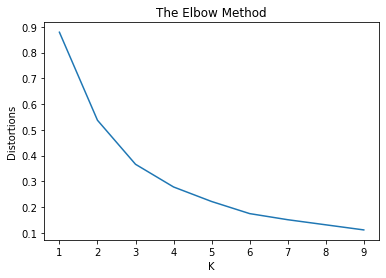

In [21]:

distortions = []

for i in range(1,10):
    kmeanModel = KMeans(n_clusters = i)
    kmeanModel.fit(df_kmeans)
    distortions.append (kmeanModel.inertia_)
    
plt.plot(range(1,10), distortions)
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('Distortions')
plt.show()

In [22]:
Kmean = KMeans(n_clusters = 6)
Kmean.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
Kmean.cluster_centers_

array([[ 43.68385121, -79.33469408],
       [ 43.73314461, -79.42830959],
       [ 43.6582793 , -79.44257054],
       [ 43.78156774, -79.30202101],
       [ 43.65466529, -79.38055991],
       [ 43.66625607, -79.57152738]])

In [24]:
# create map
map_TOR_centers = folium.Map(location=[latitude, longitude], zoom_start=11)

markers = []
folium.CircleMarker([ 43.68385121, -79.33469408], radius = 7, popup='Cluster 1', color='red').add_to(map_TOR_centers)
folium.CircleMarker([ 43.73314461, -79.42830959], radius = 7, popup='Cluster 2', color='orange').add_to(map_TOR_centers)
folium.CircleMarker([ 43.6582793 , -79.44257054], radius = 7, popup='Cluster 3', color='yellow').add_to(map_TOR_centers)
folium.CircleMarker([ 43.78156774, -79.30202101], radius = 7, popup='Cluster 4', color='green').add_to(map_TOR_centers)
folium.CircleMarker([ 43.65466529, -79.38055991], radius = 7, popup='Cluster 5', color='blue').add_to(map_TOR_centers)
folium.CircleMarker([ 43.66625607, -79.57152738], radius = 7, popup='Cluster 6', color='violet').add_to(map_TOR_centers)
       
map_TOR_centers